*Team Members*:   
Alisha Mehta, Matr.no: **221481**,  
Ashish Soni, Matr.no: **221453**,  
Peer Ahamad Shaik, matr.no: **221407**.  

Exercise Group 4.

**Multilayer Perceptron using TensorFlow 2.0**: Classification model

**MNIST dataset**

- Importing Packages [tensorflow, numpy, matplotlib]

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

- Loading data from keras.datasets

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
print("No.of images for training:", len(train_images))
print("No.of images for testing:", len(test_images))

No.of images for training: 60000
No.of images for testing: 10000


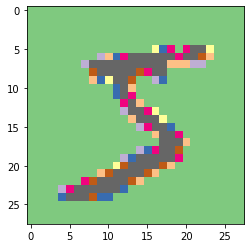

In [0]:
plt.imshow(train_images[0], cmap ="Accent")

- Declaring parameters for the model

In [0]:
#Image parameters
num_classes = len(np.unique(train_labels))
num_features = np.shape(train_images[0])[0] * np.shape(train_images[0])[1]

#Hyper-parameters
learning_rate = 0.01
training_steps = 3000
batch_size = 256
hiddenLayer_1_size = 128
hiddenLayer_2_size = 256

- Pre-processing the data

In [0]:
#converting data to float of 32 bit-size
train_images = np.array(train_images, np.float32)
test_images = np.array(test_images, np.float32)

#ravel the data
train_images = train_images.reshape([-1, num_features])
test_images = test_images.reshape([-1,num_features])

#Normalizing the data. (255 is the maximum value of a pixel here)
train_images = train_images/255.0
test_images = test_images/255.0

- Using Special attribute tf.Initalizers.randomNormal(), to randomly get the Values.

In [0]:
random_normal = tf.initializers.RandomNormal()

- Weights and bias structure declarartion:
  - storing values in dictionary, for easy access.

In [0]:
weights = {
    'h1': tf.Variable(random_normal([num_features, hiddenLayer_1_size])),
    'h2': tf.Variable(random_normal([hiddenLayer_1_size, hiddenLayer_2_size])),
    'out': tf.Variable(random_normal([hiddenLayer_2_size, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.zeros([hiddenLayer_1_size])),
    'b2': tf.Variable(tf.zeros([hiddenLayer_2_size])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

- Using tensorflow deafult API for batching the data

In [0]:
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

- **MLP MODEL**:

In [0]:
def model(x):
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  layer_1 = tf.nn.sigmoid(layer_1)

  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  layer_2 = tf.nn.sigmoid(layer_2)

  out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
  return tf.nn.softmax(out_layer)

- Declaring a method called *cross_entropy* to calculate the loss function.

In [0]:
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

- A small snippet for calculating the *accuracy*.

In [0]:
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)


In [0]:
# We are using stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

- Calculating gradients and updating the **weights** of the layers.

In [0]:
# Optimization process. 
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = model(x)
        loss = cross_entropy(pred, y)        
    # Variables to update, i.e. trainable variables.
    trainable_variables = list(weights.values()) + list(biases.values())
    gradients = g.gradient(loss, trainable_variables)    
    optimizer.apply_gradients(zip(gradients, trainable_variables))
    del g

- **Training Phase**

In [0]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    if step % 100 == 0:
        pred = model(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("Loss: {} Accuracy: {}".format(loss, acc))
        #print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

Loss: 424.19854736328125 Accuracy: 0.375
Loss: 218.25265502929688 Accuracy: 0.68359375
Loss: 116.95947265625 Accuracy: 0.8828125
Loss: 107.33373260498047 Accuracy: 0.87109375
Loss: 55.60253143310547 Accuracy: 0.93359375
Loss: 47.41075134277344 Accuracy: 0.94921875
Loss: 39.18633270263672 Accuracy: 0.95703125
Loss: 47.71690368652344 Accuracy: 0.953125
Loss: 32.49505615234375 Accuracy: 0.9765625
Loss: 32.88903045654297 Accuracy: 0.96484375
Loss: 20.520771026611328 Accuracy: 0.9765625
Loss: 17.47661590576172 Accuracy: 0.984375
Loss: 29.488393783569336 Accuracy: 0.96875
Loss: 15.423981666564941 Accuracy: 0.98828125
Loss: 15.409005165100098 Accuracy: 0.98046875
Loss: 13.061232566833496 Accuracy: 0.984375
Loss: 8.111684799194336 Accuracy: 0.9921875
Loss: 21.216163635253906 Accuracy: 0.9765625
Loss: 11.768924713134766 Accuracy: 0.98828125
Loss: 10.912610054016113 Accuracy: 0.9921875
Loss: 7.845883846282959 Accuracy: 0.99609375
Loss: 6.299642562866211 Accuracy: 0.99609375
Loss: 8.4005813598632

**Accuracy on test dataset**

In [0]:
test_preds = model(test_images)
acc = accuracy(test_preds, test_labels)
print("Test Accuracy: %f" % acc)

Test Accuracy: 0.973300
